In [1]:
import numpy as np 
import pandas as pd 
import cv2 


In [2]:
cap = cv2.VideoCapture(0)

print(cap.read())

while cap.read():
    res , frame = cap.read()
    if res == True:
        frame = cv2.imshow('video',frame)
        if cv2.waitKey(1) & 0xFF  == ord('q'):
            break 
    else:
        break
cap.release()
cv2.destroyAllWindows()

(True, array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8))


In [21]:
def individual_frame(image_frame):
    sol = cv2.cvtColor(image_frame,cv2.COLOR_BGR2GRAY)
    #return sol 
    edge = cv2.Canny(sol , 100,120)

    return edge



cap = cv2.VideoCapture('./lane_detection_video.mp4')

print(cap.read())

while cap.read():
    res , frame = cap.read()
    if res == True:
        greyscale = individual_frame(frame)
        cv2.imshow("grey",greyscale)
        #if cv2.waitKey(1) & 0xFF  == ord('q'):
            #break 
        cv2.waitKey(50)
    else:
        break
cap.release()
cv2.destroyAllWindows()

(True, array([[[122, 115, 112],
        [123, 116, 113],
        [124, 117, 114],
        ...,
        [183, 166, 160],
        [181, 164, 158],
        [180, 163, 157]],

       [[122, 115, 112],
        [123, 116, 113],
        [124, 117, 114],
        ...,
        [183, 166, 160],
        [182, 165, 159],
        [181, 164, 158]],

       [[124, 115, 112],
        [125, 116, 113],
        [126, 117, 114],
        ...,
        [184, 167, 161],
        [182, 165, 159],
        [181, 164, 158]],

       ...,

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0

### But we need to select the best portions the i will be using logical AND operator 

In [31]:
import matplotlib.pyplot as plt 

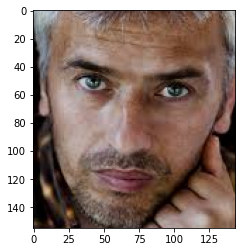

In [32]:
img = cv2.imread("./male_face.png")
plt.imshow(img[:,:,::-1])

In [33]:
# converting into graey scale 
g_i = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
#g_i = cv2.Canny(g_i,100,150)
cv2.imshow('gray',g_i)
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
g_i.shape

(155, 144)

In [35]:
a = (0,g_i.shape[0])
b = (g_i.shape[1] / 2 , g_i.shape[0] * 0.05)
c = (g_i.shape[1] , g_i.shape[0])

In [36]:
# selecting interested area 
re = [
    
    
(0,g_i.shape[0]),
(g_i.shape[1] / 2 , g_i.shape[0] * 0.65),
(g_i.shape[1] , g_i.shape[0])
    
]

In [37]:
# taking complete black image with same input image size 
black = np.zeros_like(g_i)
cv2.imshow('black',black)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
re

[(0, 155), (72.0, 100.75), (144, 155)]

In [39]:
r = np.array([re], np.int32)

In [40]:
r

array([[[  0, 155],
        [ 72, 100],
        [144, 155]]])

In [41]:
# black image with replace with white at points what we given 
d = cv2.fillPoly(black,r,255)

In [42]:
cv2.imshow('d',d)
cv2.waitKey()
cv2.destroyAllWindows()

In [43]:
# gives cutiing image 
g = cv2.bitwise_and(d , g_i)
cv2.imshow('g',g)
cv2.waitKey()
cv2.destroyAllWindows()

### Applying same logic to the video 

In [45]:
def interested_area(edge_frame,values):
    black = np.zeros_like(edge_frame)
    imp = cv2.fillPoly(black ,values , 255)
    bit_and = cv2.bitwise_and(edge_frame , imp)
    return bit_and
    



def individual_frame(image_frame):
    height = image_frame.shape[0]
    width = image_frame.shape[1]
    sol = cv2.cvtColor(image_frame,cv2.COLOR_BGR2GRAY)
    #return sol 
    edge = cv2.Canny(sol , 100,120)
    
    interested_area1 = [
        (0,height) , 
        (width /  2 , height * 0.65),
        (width , height)
        ]
    half = interested_area(edge , np.array([interested_area1] , np.int32))
    return half



cap = cv2.VideoCapture('./lane_detection_video.mp4')

print(cap.read())

while cap.read():
    res , frame = cap.read()
    if res == True:
        greyscale = individual_frame(frame)
        cv2.imshow("grey",greyscale)
        #if cv2.waitKey(1) & 0xFF  == ord('q'):
            #break 
        cv2.waitKey(50)
    else:
        break
cap.release()
cv2.destroyAllWindows()

(True, array([[[122, 115, 112],
        [123, 116, 113],
        [124, 117, 114],
        ...,
        [183, 166, 160],
        [181, 164, 158],
        [180, 163, 157]],

       [[122, 115, 112],
        [123, 116, 113],
        [124, 117, 114],
        ...,
        [183, 166, 160],
        [182, 165, 159],
        [181, 164, 158]],

       [[124, 115, 112],
        [125, 116, 113],
        [126, 117, 114],
        ...,
        [184, 167, 161],
        [182, 165, 159],
        [181, 164, 158]],

       ...,

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0

### Now we need to join the lines using Hough Algorithm and give some colors 

In [3]:
def final(image_frame,add):
    im = np.zeros((image_frame.shape[0] , image_frame.shape[1] , 3), np.uint8)
    
    for i in add:
        for x1,y1,x2,y2 in i:
            cv2.line(im,(x1,y1),(x2,y2),(0,255,255),2)
    #return im
    
    final_sol = cv2.addWeighted(image_frame,0.7,im,1,0)
    return final_sol


def interested_area(edge_frame,values):
    black = np.zeros_like(edge_frame)
    imp = cv2.fillPoly(black ,values , 255)
    bit_and = cv2.bitwise_and(edge_frame , imp)
    return bit_and
    



def individual_frame(image_frame):
    height = image_frame.shape[0]
    width = image_frame.shape[1]
    sol = cv2.cvtColor(image_frame,cv2.COLOR_BGR2GRAY)
    #return sol 
    edge = cv2.Canny(sol , 100,120)
    
    interested_area1 = [
        (0,height) , 
        (width /  2 , height * 0.65),
        (width , height)
        ]
    half = interested_area(edge , np.array([interested_area1] , np.int32))
    #return half
    
    add = cv2.HoughLinesP(half,rho = 2 ,theta = np.pi / 180, threshold = 50 , lines =np.array([]) , minLineLength = 30 , maxLineGap = 1250)
    #return add
    res = final(image_frame,add)
    return res

cap = cv2.VideoCapture('./lane_detection_video.mp4')

print(cap.read())

while cap.read():
    res , frame = cap.read()
    if res == True:
        greyscale = individual_frame(frame)
        cv2.imshow("grey",greyscale)
        #if cv2.waitKey(1) & 0xFF  == ord('q'):
            #break 
        cv2.waitKey(50)
    else:
        break
cap.release()
cv2.destroyAllWindows()

(True, array([[[122, 115, 112],
        [123, 116, 113],
        [124, 117, 114],
        ...,
        [183, 166, 160],
        [181, 164, 158],
        [180, 163, 157]],

       [[122, 115, 112],
        [123, 116, 113],
        [124, 117, 114],
        ...,
        [183, 166, 160],
        [182, 165, 159],
        [181, 164, 158]],

       [[124, 115, 112],
        [125, 116, 113],
        [126, 117, 114],
        ...,
        [184, 167, 161],
        [182, 165, 159],
        [181, 164, 158]],

       ...,

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  3,   4,   0],
        [  3,   4,   0],
        [  3,   4,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0

In [4]:
def final(image_frame,add):
    im = np.zeros((image_frame.shape[0] , image_frame.shape[1] , 3), np.uint8)
    
    for i in add:
        for x1,y1,x2,y2 in i:
            cv2.line(im,(x1,y1),(x2,y2),(0,255,255),2)
    #return im
    
    final_sol = cv2.addWeighted(image_frame,0.7,im,1,0)
    return final_sol


def interested_area(edge_frame,values):
    black = np.zeros_like(edge_frame)
    imp = cv2.fillPoly(black ,values , 255)
    bit_and = cv2.bitwise_and(edge_frame , imp)
    return bit_and
    



def individual_frame(image_frame):
    height = image_frame.shape[0]
    width = image_frame.shape[1]
    sol = cv2.cvtColor(image_frame,cv2.COLOR_BGR2GRAY)
    #return sol 
    edge = cv2.Canny(sol , 100,120)
    
    interested_area1 = [
        (0,height) , 
        (width /  2 , height * 0.65),
        (width , height)
        ]
    half = interested_area(edge , np.array([interested_area1] , np.int32))
    #return half
    
    add = cv2.HoughLinesP(half,rho = 2 ,theta = np.pi / 180, threshold = 50 , lines =np.array([]) , minLineLength = 140 , maxLineGap = 1250)
    #return add
    res = final(image_frame,add)
    return res

cap = cv2.VideoCapture('./solidWhiteRight.mp4')
saving = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',saving,20.0,(640,480))
print(cap.read())

while cap.read():
    res , frame = cap.read()
    if res == True:
        greyscale = individual_frame(frame)
        out.write(greyscale)
        cv2.imshow("grey",greyscale)
        #if cv2.waitKey(1) & 0xFF  == ord('q'):
            #break 
        cv2.waitKey(50)
        
    else:
        break
cap.release()
cv2.destroyAllWindows()

(True, array([[[201, 162, 109],
        [201, 162, 109],
        [201, 162, 109],
        ...,
        [ 50,  42,  44],
        [ 47,  39,  41],
        [ 47,  39,  41]],

       [[201, 162, 109],
        [201, 162, 109],
        [201, 162, 109],
        ...,
        [ 50,  42,  44],
        [ 47,  39,  41],
        [ 47,  39,  41]],

       [[201, 162, 109],
        [201, 162, 109],
        [201, 162, 109],
        ...,
        [ 50,  42,  44],
        [ 49,  41,  43],
        [ 47,  39,  41]],

       ...,

       [[ 95,  83,  83],
        [ 95,  83,  83],
        [ 95,  83,  83],
        ...,
        [ 96,  88,  90],
        [ 96,  88,  90],
        [ 94,  86,  88]],

       [[ 95,  85,  80],
        [ 95,  85,  80],
        [ 93,  83,  78],
        ...,
        [ 96,  86,  88],
        [ 96,  86,  88],
        [ 94,  84,  86]],

       [[ 95,  85,  80],
        [ 95,  85,  80],
        [ 93,  83,  78],
        ...,
        [ 93,  83,  85],
        [ 93,  83,  85],
        [ 90,  80